<a href="https://colab.research.google.com/github/PraneetVR/IIITDMJ-DL-Summer-School-Program-Assignments/blob/main/Week_1_Day_4_IIITDMJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 1 Day 4 Assignment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification

#P1
(Compare the Loss functions)

In [ ]:
Xr, yr = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
yr = yr.reshape(-1, 1)

Xc, yc = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0,n_clusters_per_class=1, flip_y=0, random_state=42)
yc = yc.reshape(-1, 1)

lr = 0.01
epochs = 100

wr = np.random.randn(1, 1)
br = np.zeros((1,))
losses_reg = []

for epoch in range(epochs):
    y_pred_r = Xr @ wr + br
    loss = np.mean((y_pred_r - yr) ** 2)
    losses_reg.append(loss)

    grad_w = 2 * np.mean((y_pred_r - yr) * Xr, axis=0, keepdims=True).T
    grad_b = 2 * np.mean(y_pred_r - yr)

    wr -= lr * grad_w
    br -= lr * grad_b

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

wc = np.random.randn(1, 1)
bc = np.zeros((1,))
losses_clf = []

In [ ]:
for epoch in range(epochs):
    logits = Xc @ wc + bc
    y_pred_c = sigmoid(logits)

    loss = -np.mean(yc * np.log(y_pred_c + 1e-8) + (1 - yc) * np.log(1 - y_pred_c + 1e-8))
    losses_clf.append(loss)

    grad_logits = y_pred_c - yc
    grad_w = np.mean(grad_logits * Xc, axis=0, keepdims=True).T
    grad_b = np.mean(grad_logits)

    wc -= lr * grad_w
    bc -= lr * grad_b

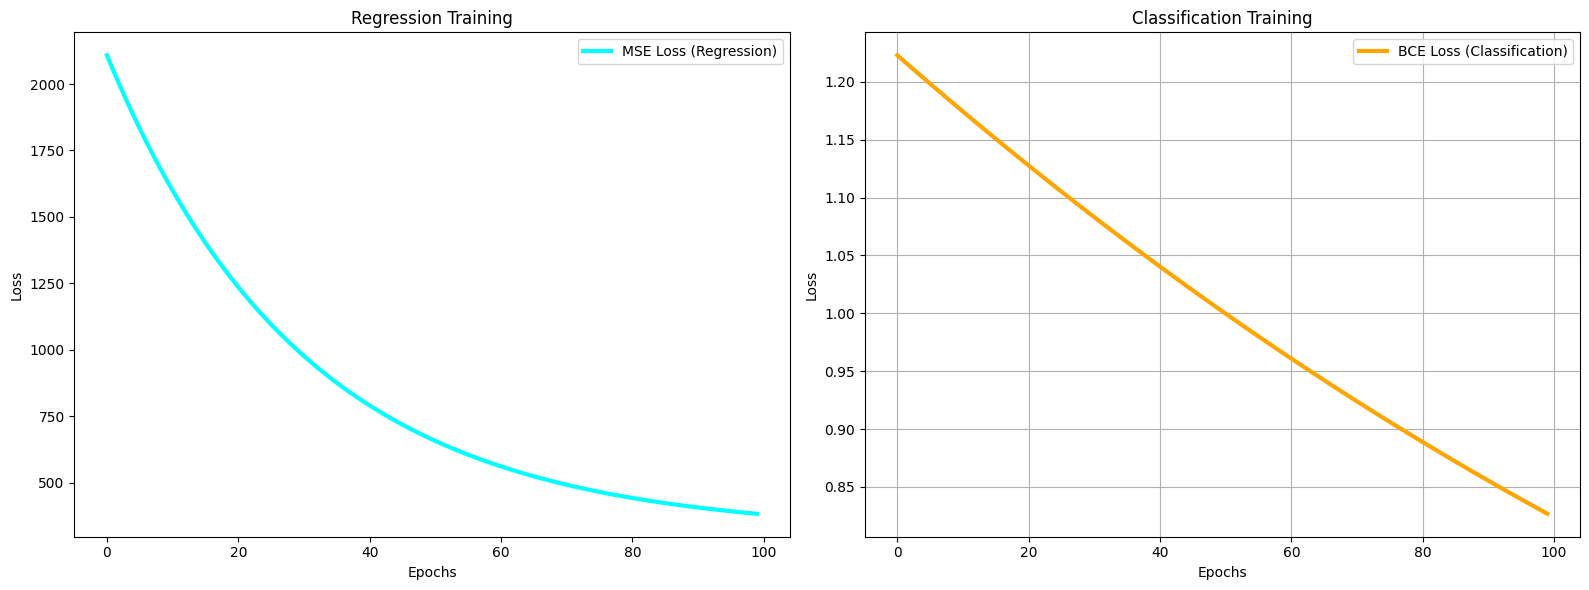

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(losses_reg, color='cyan', linewidth=3, label='MSE Loss (Regression)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].set_title('Regression Training')

axes[1].plot(losses_clf, color='orange', linewidth=3, label='BCE Loss (Classification)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].set_title('Classification Training')

plt.tight_layout()
plt.show()

#P2
(Compare the Learning Rate Effects)

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = y.reshape(-1, 1)

learning_rates = [0.01, 0.1, 1]
epochs = 100

losses_all = {}

for lr in learning_rates:
    w = np.random.randn(2, 1)
    b = np.zeros((1,))
    losses = []
    for epoch in range(epochs):
        logits = X @ w + b
        y_pred = sigmoid(logits)

        loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
        losses.append(loss)

        grad_logits = y_pred - y
        grad_w = np.mean(grad_logits * X, axis=0, keepdims=True).T
        grad_b = np.mean(grad_logits)

        w -= lr * grad_w
        b -= lr * grad_b
    losses_all[lr] = losses


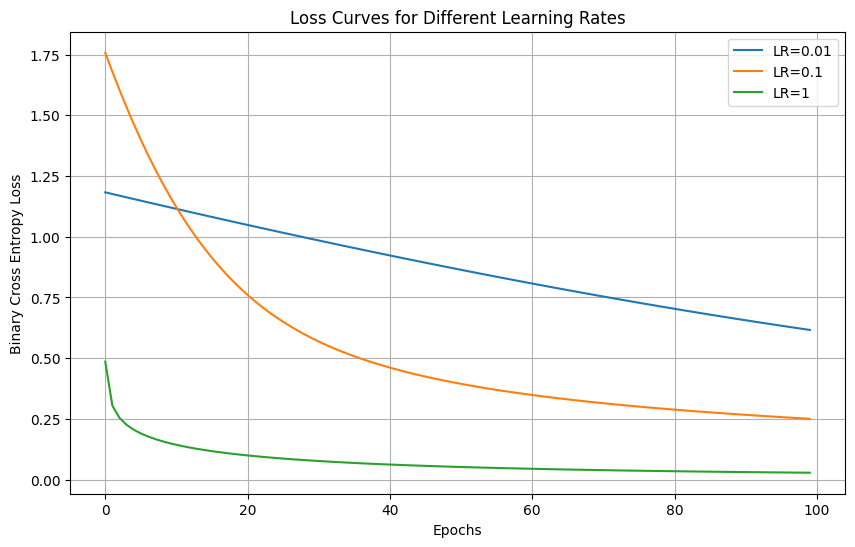

In [ ]:
plt.figure(figsize=(10, 6))
for lr, losses in losses_all.items():
    plt.plot(losses, label=f'LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Loss Curves for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

#Learning Rate Effects
###Speed of Convergence
Higher learning rate (LR=1): Learns much faster and loss drops quickly.

Medium learning rate (LR=0.1): Learns at a moderate speed.

Low learning rate (LR=0.01): Learns slowly, loss decreases gradually.

###Stability of Training
High LR (1): It converges well.

Medium LR (0.1): Very stable and smooth learning.

Low LR (0.01): Stable but very slow progress.
